# Model Training

## 1.1 Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

# Import the CSV file

In [2]:
train_df = pd.read_csv('final_train_df.csv')

In [3]:
train_df.head()

,Total_Stops,Price,Day,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = train_df.drop('Price', axis=1)

In [8]:
y = train_df['Price']

In [9]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10682, dtype: int64

## Finding Correlation

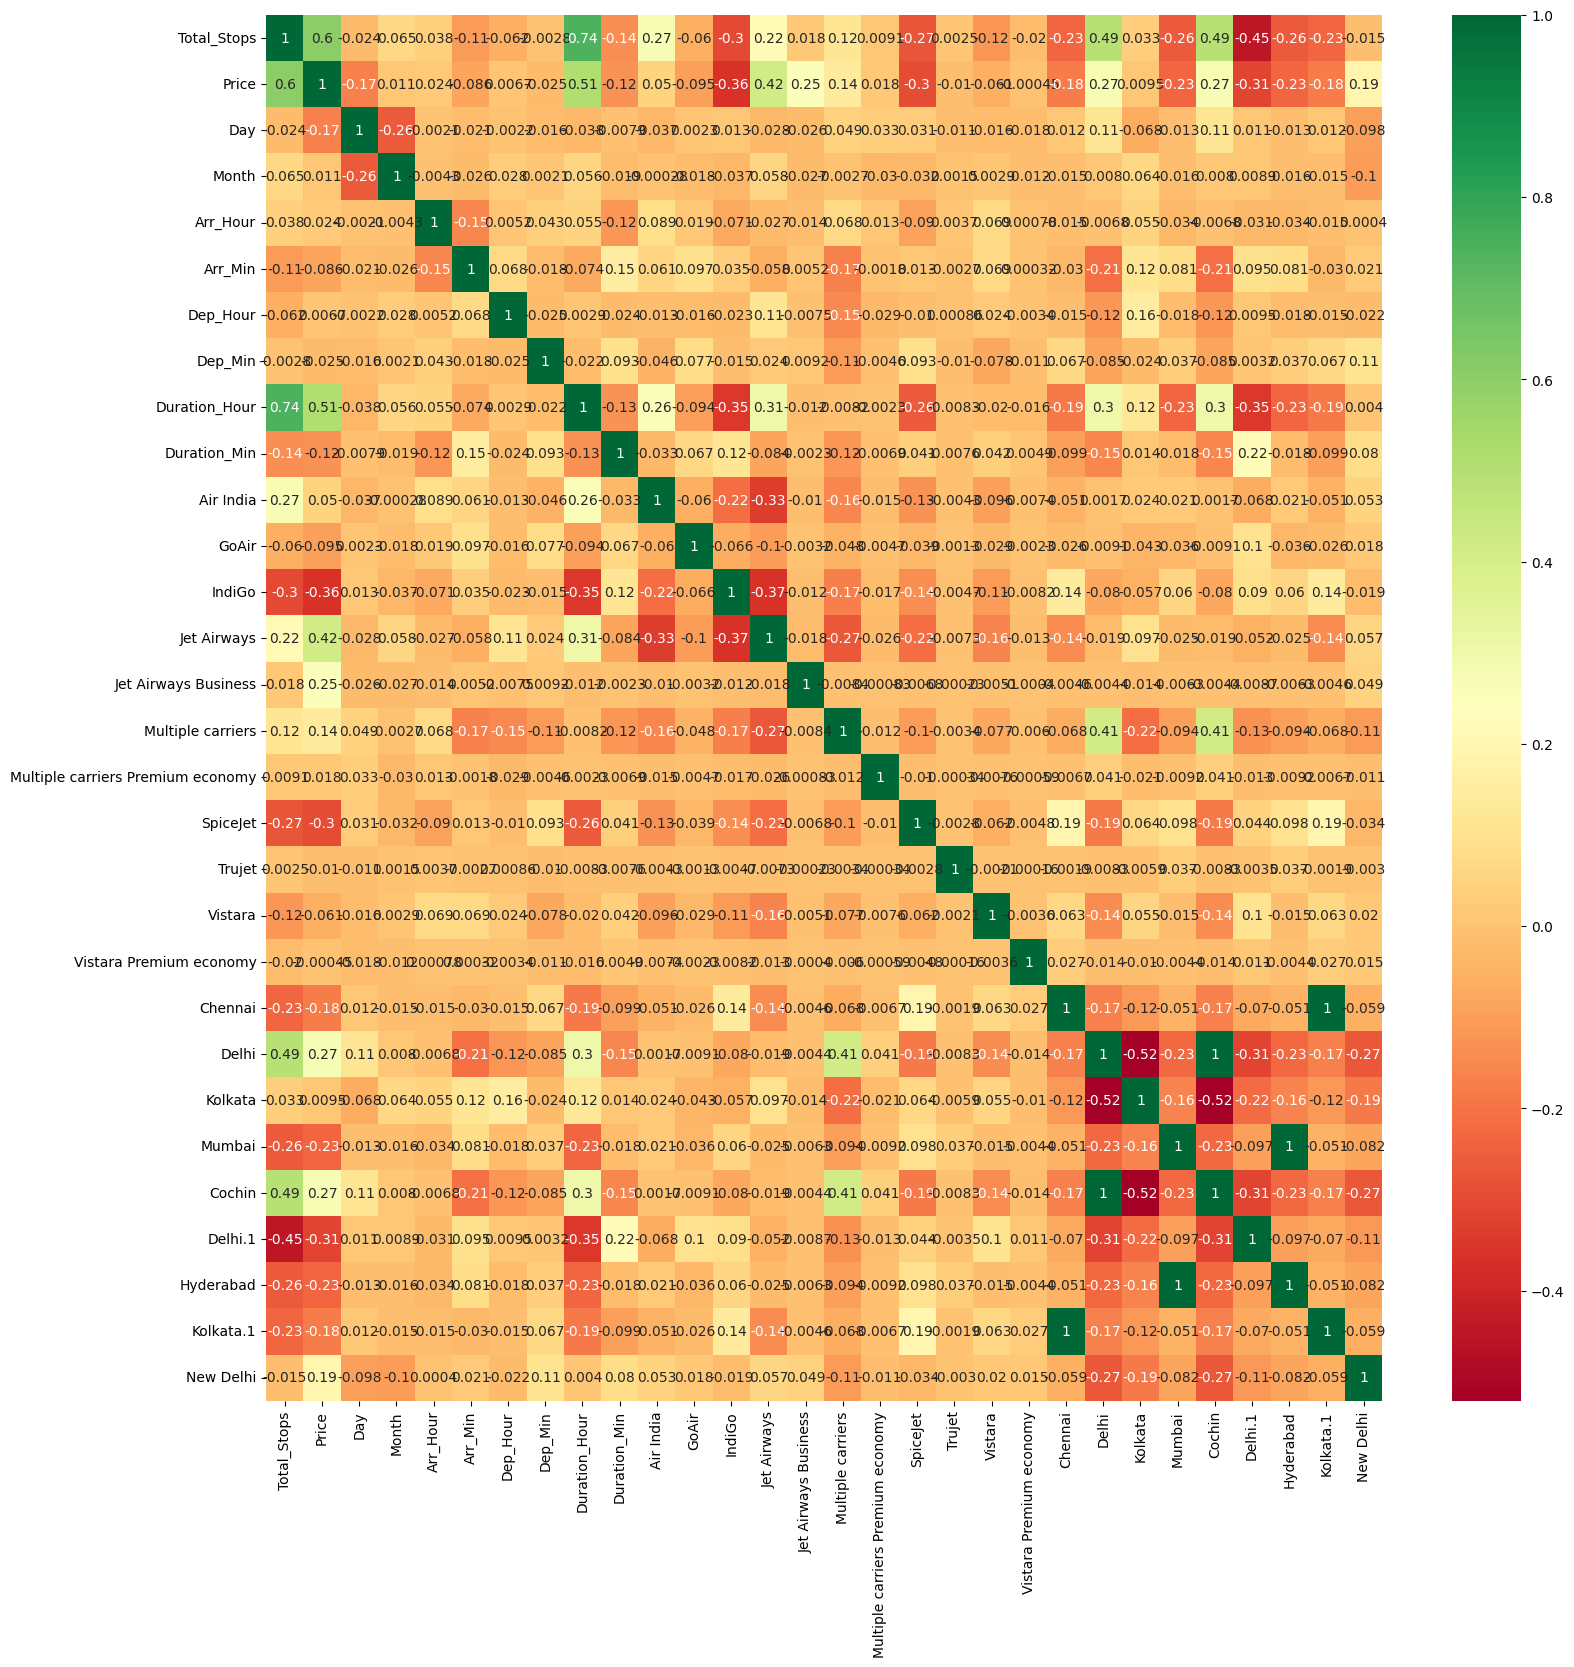

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Feature Selection

#### Splitting The Dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape

((8545, 29), (2137, 29))

#### Create an Evaluate Function to give all metrics after model Training

- MAE is the average of the absolute differences between the predicted and actual values. It gives an idea of how close the predictions are to the actual values, but it does not penalize large errors as heavily as other metrics.

- MSE is the average of the squared differences between the predicted and actual values. It penalizes large errors more heavily than MAE, which can make it more useful in some cases.

- RMSE is the square root of the MSE. It has the same units as the target variable and gives an idea of how far the predicted values are from the actual values. RMSE is often used to compare the performance of different models.

- R2 is a statistical measure that represents the proportion of the variance in the target variable that is explained by the regression model. It ranges from 0 to 1, with higher values indicating a better fit. R2 can be used to compare the performance of different regression models and is often used as a benchmark for goodness of fit.

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted),
    mse = mean_squared_error(true, predicted),
    rmse = np.sqrt(mean_squared_error(true, predicted)),
    r2 = r2_square(true, predicted)

    return mae, rmse, r2